In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.ExcelFile("data.xlsx")
sheet_names = df.sheet_names
sheet_names
start_year = 1994
end_year = 2022
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]
months_ind = {
    "January": "00",
    "February": "01",
    "March": "02",
    "April": "03",
    "May": "04",
    "June": "05",
    "July": "06",
    "August": "07",
    "September": "08",
    "October": "09",
    "November": "10",
    "December": "11"
}


In [2]:
sheet_names


['temperature',
 'humidity',
 'rainfall',
 'sunshine',
 'commodities_volume_2000_2022']

In [3]:
pd_commodities = pd.read_excel(
    df, "commodities_volume_2000_2022", skiprows=[0])
pd_commodities = pd_commodities[["Year and Month", "Rice"]]
rows_to_keep = []
start_num = 2
for i in range(22):
    rows_to_keep.append([x for x in range(start_num, start_num + 12)])
    start_num += 14

temp_array = []
for i in range(len(rows_to_keep)):
    year = 2000+i
    ls = [year]
    for i in pd_commodities["Rice"].iloc[rows_to_keep[i]].to_list():
        ls.append(i)
    temp_array.append(ls)
    # print(ls)
pd_commodities_2000_2021 = pd.DataFrame(temp_array, columns=["year"]+months)
pd_commodities_2000_2021["total_annual_volume_commodities"] = pd_commodities_2000_2021[months].sum(
    axis=1)
pd_commodities_2000_2021 = pd_commodities_2000_2021[[
    "year", "total_annual_volume_commodities"]]
pd_commodities_2000_2021
# temp_array


,year,total_annual_volume_commodities
0,2000,207637.6
1,2001,209041.9
2,2002,193415.2
3,2003,200431.6
4,2004,243091.6
5,2005,182199.8
6,2006,204578.0
7,2007,269435.5
8,2008,196242.6
9,2009,260816.0


In [4]:
skip_rows = [0]+[i for i in range(2, 21)]
pd_rainfall_2000_2021 = pd.read_excel(
    df, "rainfall", skiprows=skip_rows, nrows=22)
pd_rainfall_2000_2021 = pd_rainfall_2000_2021[[
    "Year", "Total"]].apply(pd.to_numeric)
pd_rainfall_2000_2021.rename(
    columns={"Year": "year", "Total": "total_annual_mean_rainfall"}, inplace="True")
pd_rainfall_2000_2021


,year,total_annual_mean_rainfall
0,2000,2765.8
1,2001,1592.2
2,2002,2061.7
3,2003,1757.7
4,2004,2421.3
5,2005,3315.5
6,2006,2826.3
7,2007,2958.2
8,2008,3536.2
9,2009,1962.3


In [5]:
pd_sunshine_1994_2021 = pd.read_excel(df, "sunshine", skiprows=[0], nrows=29)
pd_sunshine_2000_2021 = pd_sunshine_1994_2021.iloc[6:-1].reset_index(
    drop=True)[["Year", "Annual Mean"]].apply(pd.to_numeric)
pd_sunshine_2000_2021.rename(columns={
                             "Year": "year", "Annual Mean": "total_mean_annual_sunshine"}, inplace="True")
pd_sunshine_2000_2021


,year,total_mean_annual_sunshine
0,2000,6.4
1,2001,7.6
2,2002,6.9
3,2003,7.2
4,2004,7.3
5,2005,6.8
6,2006,6.9
7,2007,6.9
8,2008,6.8
9,2009,7.4


In [6]:
pd_temperature_1982_2022_temp = pd.read_excel(
    df, "temperature", skiprows=[0], nrows=82)
pd_temperature_1982_2022_temp = pd_temperature_1982_2022_temp[[
    "Year", "Level", "Annual Mean"]]
pd_temperature_1982_2022_temp["Year"] = pd_temperature_1982_2022_temp["Year"].ffill(
).apply(lambda x: int(x))
start_year_index = pd_temperature_1982_2022_temp.loc[
    pd_temperature_1982_2022_temp["Year"] == 2000].index[0]
end_year_index = pd_temperature_1982_2022_temp.loc[
    pd_temperature_1982_2022_temp["Year"] == 2021].index[-1]+1
pd_temperature_2000_2021_temp = pd_temperature_1982_2022_temp.iloc[start_year_index:end_year_index].reset_index(
    drop=True)
pd_temperature_2000_2021_temp.head()

temp = []
for index, row in pd_temperature_2000_2021_temp.iterrows():
    if index % 2 == 0:
        temp.append([row["Year"], row["Annual Mean"],
                    pd_temperature_2000_2021_temp.loc[index+1]["Annual Mean"]])
pd_temperature_2000_2021 = pd.DataFrame(
    temp, columns=["year", "max_mean_annual_temperature", "min_mean_annual_temperature"])
pd_temperature_2000_2021


,year,max_mean_annual_temperature,min_mean_annual_temperature
0,2000,30.1,24.0
1,2001,30.2,24.3
2,2002,30.2,24.1
3,2003,30.9,24.2
4,2004,30.9,24.2
5,2005,31.0,24.3
6,2006,30.4,24.0
7,2007,30.7,23.4
8,2008,30.2,24.0
9,2009,30.3,24.0


In [7]:
pd_humidity_1982_2022_temp = pd.read_excel(
    df, "humidity", skiprows=[0], nrows=82)
pd_humidity_1982_2022_temp = pd_humidity_1982_2022_temp[[
    "Year", "Period", "Annual Mean"]]
pd_humidity_1982_2022_temp["Year"] = pd_humidity_1982_2022_temp["Year"].ffill(
).apply(lambda x: int(x))
start_year_index = pd_humidity_1982_2022_temp.loc[pd_humidity_1982_2022_temp["Year"] == 2000].index[0]
end_year_index = pd_humidity_1982_2022_temp.loc[pd_humidity_1982_2022_temp["Year"]
                                                == 2021].index[-1]+1
pd_humidity_2000_2021_temp = pd_humidity_1982_2022_temp.iloc[start_year_index:end_year_index].reset_index(
    drop=True)
pd_humidity_2000_2021_temp

temp = []
for index, row in pd_humidity_2000_2021_temp.iterrows():
    if index % 2 == 0:
        temp.append([row["Year"], row["Annual Mean"],
                    pd_humidity_2000_2021_temp.loc[index+1]["Annual Mean"]])
pd_humidity_2000_2021 = pd.DataFrame(temp, columns=[
                                     "year", "morning_mean_annual_humidity", "afternoon_mean_annual_humidity"])
pd_humidity_2000_2021["mean_annual_humidity"] = pd_humidity_2000_2021[[
    "morning_mean_annual_humidity", "afternoon_mean_annual_humidity"]].mean(axis=1)
# pd_humity_2000_2021[["mean_annual_humidity_logged"]] = pd_humidity_2000_2021.
pd_humidity_2000_2021


,year,morning_mean_annual_humidity,afternoon_mean_annual_humidity,mean_annual_humidity
0,2000,80,71,75.5
1,2001,77,69,73.0
2,2002,77,71,74.0
3,2003,79,70,74.5
4,2004,81,71,76.0
5,2005,83,74,78.5
6,2006,81,75,78.0
7,2007,82,74,78.0
8,2008,81,72,76.5
9,2009,79,71,75.0


In [8]:
analysis_df_2000_2021 = pd.merge(
    pd_rainfall_2000_2021, pd_humidity_2000_2021, left_on="year", right_on="year")
analysis_df_2000_2021 = pd.merge(
    pd_sunshine_2000_2021, analysis_df_2000_2021, left_on="year", right_on="year")
analysis_df_2000_2021 = pd.merge(
    pd_temperature_2000_2021, analysis_df_2000_2021, left_on="year", right_on="year")
analysis_df_2000_2021 = pd.merge(
    pd_commodities_2000_2021, analysis_df_2000_2021, left_on="year", right_on="year")
analysis_df_2000_2021


,year,total_annual_volume_commodities,max_mean_annual_temperature,min_mean_annual_temperature,total_mean_annual_sunshine,total_annual_mean_rainfall,morning_mean_annual_humidity,afternoon_mean_annual_humidity,mean_annual_humidity
0,2000,207637.6,30.1,24.0,6.4,2765.8,80,71,75.5
1,2001,209041.9,30.2,24.3,7.6,1592.2,77,69,73.0
2,2002,193415.2,30.2,24.1,6.9,2061.7,77,71,74.0
3,2003,200431.6,30.9,24.2,7.2,1757.7,79,70,74.5
4,2004,243091.6,30.9,24.2,7.3,2421.3,81,71,76.0
5,2005,182199.8,31.0,24.3,6.8,3315.5,83,74,78.5
6,2006,204578.0,30.4,24.0,6.9,2826.3,81,75,78.0
7,2007,269435.5,30.7,23.4,6.9,2958.2,82,74,78.0
8,2008,196242.6,30.2,24.0,6.8,3536.2,81,72,76.5
9,2009,260816.0,30.3,24.0,7.4,1962.3,79,71,75.0


In [9]:
analysis_df_2000_2021.columns


Index(['year', 'total_annual_volume_commodities',
       'max_mean_annual_temperature', 'min_mean_annual_temperature',
       'total_mean_annual_sunshine', 'total_annual_mean_rainfall',
       'morning_mean_annual_humidity', 'afternoon_mean_annual_humidity',
       'mean_annual_humidity'],
      dtype='object')

<Axes: xlabel='year', ylabel='total_annual_mean_rainfall'>

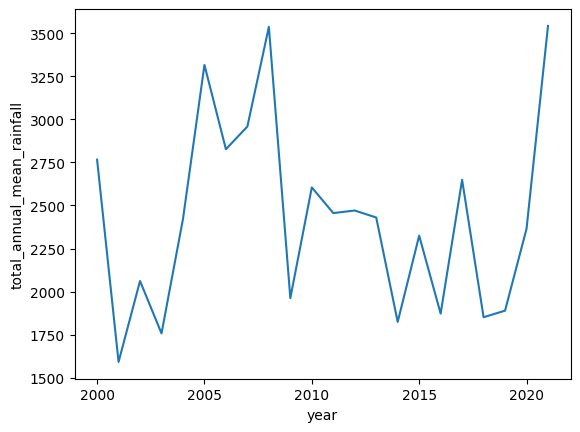

In [10]:
sns.lineplot(x=analysis_df_2000_2021["year"],
             y=analysis_df_2000_2021["total_annual_mean_rainfall"])


<Axes: >

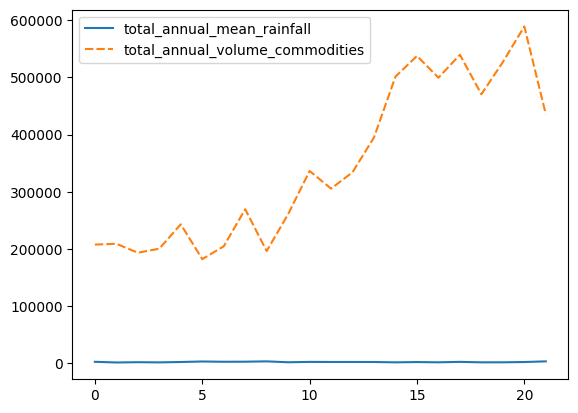

In [11]:
sns.lineplot(data=analysis_df_2000_2021[[
             "total_annual_mean_rainfall", "total_annual_volume_commodities"]])


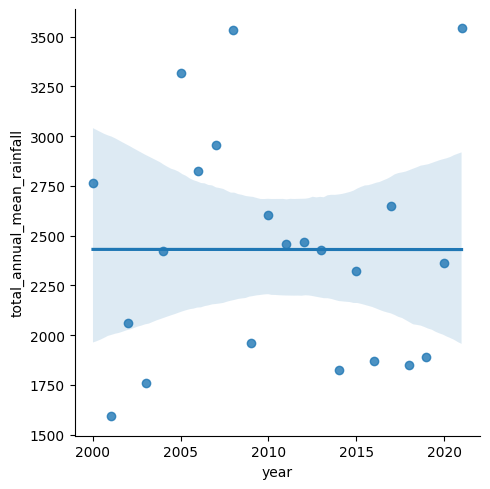

In [12]:
sns.lmplot(x="year", y="total_annual_mean_rainfall",
           data=analysis_df_2000_2021)


c:\Users\simeo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\simeo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


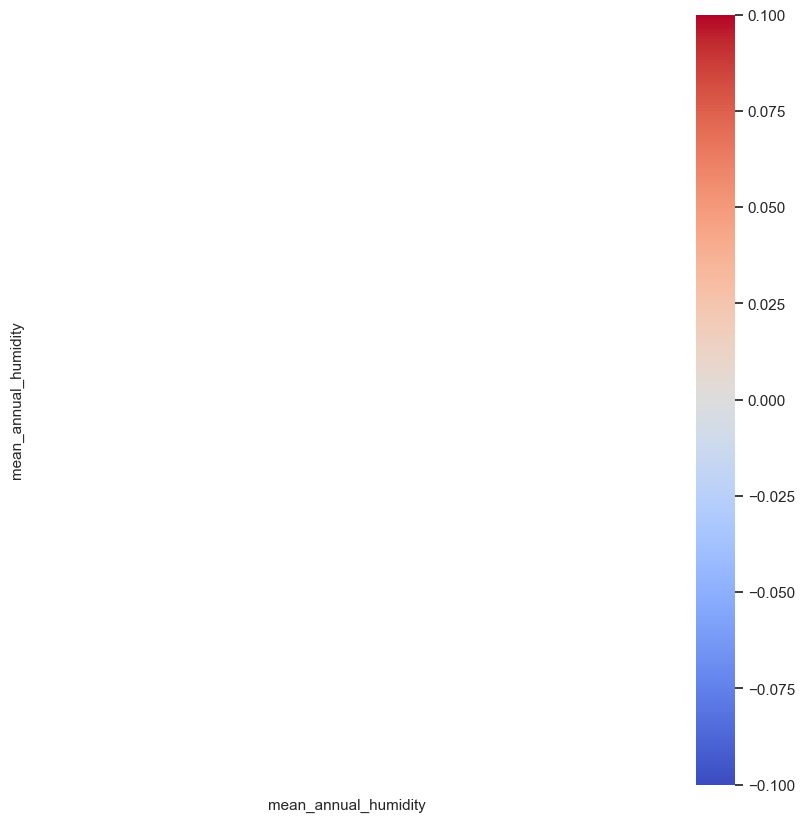

In [13]:
x_columns = [
    'max_mean_annual_temperature',
    'min_mean_annual_temperature',
    'total_mean_annual_sunshine',
    'total_annual_mean_rainfall',
    'mean_annual_humidity'
]
plt.figure(figsize=(10, 10))
sns.set_theme(style="white")
analysis_df_corr = analysis_df_2000_2021[x_columns].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')


In [14]:
X = analysis_df_2000_2021[x_columns]
X = sm.add_constant(X)
y = analysis_df_2000_2021["total_annual_volume_commodities"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_annual_volume_commodities   R-squared:                       0.471
Model:                                         OLS   Adj. R-squared:                  0.445
Method:                              Least Squares   F-statistic:                     17.80
Date:                             Fri, 12 May 2023   Prob (F-statistic):           0.000421
Time:                                     08:22:08   Log-Likelihood:                -284.51
No. Observations:                               22   AIC:                             573.0
Df Residuals:                                   20   BIC:                             575.2
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.809e+06   7.48e+05     -3.754      0.001   -4.37e+06   -1.25e+06
mean_annual_humidity  4.065e+04   9634.802      4.220      0.000    2.06e+04    6.08e+04
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.248
Skew:                           0.019   Prob(JB):                        0.883
Kurtosis:                       2.481   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""